In [1]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., height + 0.01, '%.1f'%float(height),
                ha='center', va='bottom', fontsize=20, fontname="stixgeneral")

In [4]:
def autolabel(x, y, ax):
    for x_i, y_i in zip(x, y):
        if float(y_i) == 29.3:
            bias = -2.5
        else:
            bias = 0.5
        ax.text(x_i, y_i + bias, '%.2f'%float(y_i),
                ha='center', va='bottom', fontsize=20, fontname="stixgeneral")
        
def plot(single, finetune, x_labels, _range, title):
    _data = []
    for ls in [single, finetune]:
        data = [value[1] for value in ls]
        _data.append(data)
    data = np.array(list(zip(*_data)))

    length = len(data)

    # Set plot parameters
    fig, ax = plt.subplots(figsize=(10, 7))
    sns.set_style("whitegrid", {'grid.linestyle': '--'})
    plt.xlabel("Sentence Pair Size", fontsize=30, fontname="stixgeneral")
    plt.ylabel("BLEU", fontsize=30, fontname="stixgeneral")

    width = 1.0 # width of bar
    x = np.arange(length)

    ax1 = sns.lineplot(x, data[:,0], palette=['black'], label='Direct', marker="o", markersize=16, linewidth=3.0)
    ax2 = sns.lineplot(x, data[:,1], palette=['black'], label='mRASP', marker="^", markersize=16, linewidth=3.0)  # #0F52BA

    autolabel(x, data[:,0], ax1)
    autolabel(x, data[:,1], ax2)
    ax.tick_params(labelsize=24)
    ax.set_ylim(_range[0], _range[1])
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels, fontsize=24)
    plt.yticks(fontname="stixgeneral") 
    plt.xticks(fontname="stixgeneral") 
    ax.legend(fontsize=20, prop=font)
    ax.set_title(title, fontsize=22)

    plt.grid(True, 'major', 'y', ls='--', lw=2.2, c='k', alpha=.3)
    
    fig.tight_layout()
    plt.show()
    return fig

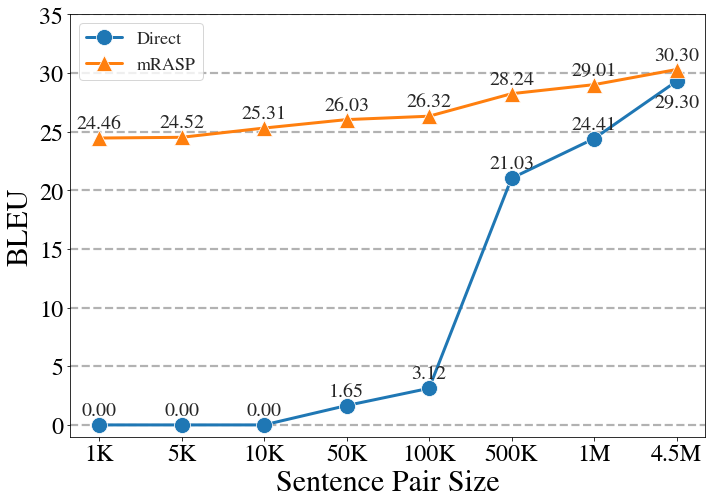

In [5]:
noalign = [(2, 0.), (3, 0.), (4, 0.), (5, 1.65), (6, 3.12), (7, 21.03), (8, 24.41), (9, 29.3)]
align = [(2, 24.46), (3, 24.52), (4, 25.31), (5, 26.03), (6, 26.32), (7, 28.24), (8, 29.01), (9, 30.3)]
x_labels = ['1K', '5K', '10K', '50K', '100K', '500K', '1M', '4.5M']

fig = plot(noalign, align, x_labels, [-1, 35.], '')
fig.savefig("compare.pdf")